# Predicting Car Prices

In this project we'll be working with [automobile sales data](https://archive.ics.uci.edu/ml/datasets/automobile) from the UCI Machine Learning Repository. The goal of the project is to produce a model for accurately predicting the sale price of a vehicle given a number of its features. In this project we will be working with K-Nearest Neighbors regressor and be investigating how different features effect the prediction accuracy.

As always, we begin with some data exploration and cleaning.

In [190]:
import pandas as pd

pd.options.display.max_columns = 150
cars = pd.read_csv('imports-85.data', header = None)
print(cars.head(3))
cars.columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
print(cars.head(3))

   0  1            2    3    4    5            6    7      8     9      10  \
0   3  ?  alfa-romero  gas  std  two  convertible  rwd  front  88.6  168.8   
1   3  ?  alfa-romero  gas  std  two  convertible  rwd  front  88.6  168.8   
2   1  ?  alfa-romero  gas  std  two    hatchback  rwd  front  94.5  171.2   

     11    12    13    14    15   16    17    18    19   20   21    22  23  \
0  64.1  48.8  2548  dohc  four  130  mpfi  3.47  2.68  9.0  111  5000  21   
1  64.1  48.8  2548  dohc  four  130  mpfi  3.47  2.68  9.0  111  5000  21   
2  65.5  52.4  2823  ohcv   six  152  mpfi  2.68  3.47  9.0  154  5000  19   

   24     25  
0  27  13495  
1  27  16500  
2  26  16500  
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std       

In [191]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

No missing values in any of the rows.

Numeric columns that can be used as features as they currently are:
1. symboling
2. wheel-base
3. length
4. width
5. height
6. curb-weight
7. engine-size
8. compression-ratio
9. city-mpg
10. highway-mpg
11. price

In [192]:
import numpy as np
cars = cars.replace('?', np.nan)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


There are a number of columns that may have be converted to objects since their missing values have been labeled as '?'. These columns are:

1. normalized losses 
2. num-of-doors
3. num-of-cylinders
4. bore
5. stroke
6. horsepower
7. peak rpm


Of these columns, all but the num-of-cylinders and num-of-doors columns can be simply cast to int or float types. The former two require that we identify the unique string values in the columns and replace them with their numeric equivalent. 

In [193]:
to_numeric = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
for item in to_numeric:
    cars[item] = cars[item].astype('float64')

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [194]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-

In [195]:
# Deal with making the number of doors and cylinders numeric
print(cars['num-of-doors'].value_counts())
print(cars['num-of-cylinders'].value_counts())

def string_to_digit(string):
    if string == 'two':
        return float(2)
    elif string == 'three':
        return float(3)
    elif string == 'four':
        return float(4)
    elif string == 'five':
        return 5
    elif string == 'six':
        return 6
    elif string == 'eight':
        return 8
    elif string == 'twelve':
        return 12

def numerize_string(row):
    return string_to_digit(row)
    
    

cars['num-of-doors'] = cars['num-of-doors'].apply(numerize_string)
cars['num-of-cylinders'] = cars['num-of-cylinders'].apply(numerize_string)
    
cars.head()

four    114
two      89
Name: num-of-doors, dtype: int64
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4.0,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4.0,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6.0,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4.0,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5.0,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [196]:
# Determine how much of the normalized losses column has missing values
print(sum(cars['normalized-losses'].isna()))

# Get a copy of the rows that are missing a value for normalized losses
subset = cars[cars['normalized-losses'].isna()]

subset.head()

41


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4.0,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4.0,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6.0,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,2.0,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,5.0,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,4.0,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,5.0,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0


In [197]:
# See how many of the rows have multiple pieces of missing information
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 193
Data columns (total 26 columns):
symboling            41 non-null int64
normalized-losses    0 non-null float64
make                 41 non-null object
fuel-type            41 non-null object
aspiration           41 non-null object
num-of-doors         40 non-null float64
body-style           41 non-null object
drive-wheels         41 non-null object
engine-location      41 non-null object
wheel-base           41 non-null float64
length               41 non-null float64
width                41 non-null float64
height               41 non-null float64
curb-weight          41 non-null int64
engine-type          41 non-null object
num-of-cylinders     41 non-null float64
engine-size          41 non-null int64
fuel-system          41 non-null object
bore                 41 non-null float64
stroke               41 non-null float64
compression-ratio    41 non-null float64
horsepower           39 non-null float64
peak-rpm 

There is:

- 1 entry missing num-of-doors
- 2 entries missing horsepower and peak-rpm
- 4 entires missing price

We can isolate the entires missing price and see if some of these rows don't overlap.

In [198]:
no_price = subset[subset['price'].isna()]

no_price

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,NaN,audi,gas,turbo,2.0,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,5.0,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,isuzu,gas,std,2.0,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,4.0,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,isuzu,gas,std,4.0,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,4.0,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,porsche,gas,std,2.0,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,8.0,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


Unforunately no luck here. Seeing as we are trying to predict car price it wouldn't make sense to have these columns anyways so we can safely remove them from the overall dataset and our analysis

In [199]:
cars = cars[cars['price'].notnull()]
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
symboling            201 non-null int64
normalized-losses    164 non-null float64
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         199 non-null float64
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null float64
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 197 non-null float64
stroke               197 non-null float64
compression-ratio    201 non-null float64
horsepower           199 no

In [200]:
subset = cars[cars['normalized-losses'].isna()]
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 193
Data columns (total 26 columns):
symboling            37 non-null int64
normalized-losses    0 non-null float64
make                 37 non-null object
fuel-type            37 non-null object
aspiration           37 non-null object
num-of-doors         36 non-null float64
body-style           37 non-null object
drive-wheels         37 non-null object
engine-location      37 non-null object
wheel-base           37 non-null float64
length               37 non-null float64
width                37 non-null float64
height               37 non-null float64
curb-weight          37 non-null int64
engine-type          37 non-null object
num-of-cylinders     37 non-null float64
engine-size          37 non-null int64
fuel-system          37 non-null object
bore                 37 non-null float64
stroke               37 non-null float64
compression-ratio    37 non-null float64
horsepower           35 non-null float64
peak-rpm 

We have three remaining problematic data points. We will drop these rows as overall the resultant information loss (about 0.6% of the total data set) should not have a large impact on our analysis and model fitting. To determine what to do with the normalized-losses column, we will calculate the mean and median of the distribution. If they are relatively close, we may find it is appropriate to impute the missing values with one of these two values.

In [201]:
cars = cars[cars['horsepower'].notnull()]
cars = cars[cars['num-of-doors'].notnull()]

cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 204
Data columns (total 26 columns):
symboling            197 non-null int64
normalized-losses    163 non-null float64
make                 197 non-null object
fuel-type            197 non-null object
aspiration           197 non-null object
num-of-doors         197 non-null float64
body-style           197 non-null object
drive-wheels         197 non-null object
engine-location      197 non-null object
wheel-base           197 non-null float64
length               197 non-null float64
width                197 non-null float64
height               197 non-null float64
curb-weight          197 non-null int64
engine-type          197 non-null object
num-of-cylinders     197 non-null float64
engine-size          197 non-null int64
fuel-system          197 non-null object
bore                 193 non-null float64
stroke               193 non-null float64
compression-ratio    197 non-null float64
horsepower           197 no

In [202]:
mean_losses = cars['normalized-losses'].mean()
print(mean_losses)
median_losses = cars['normalized-losses'].median()
print(median_losses)

121.84049079754601
115.0


There seems to be a relatively small difference between the mean and median values of the normalized-losses column (about 5.5%) so we feel confident imputing the missing values with the mean of the column. We'll use this same approach for the bore and stroke to see if we can confidently impute values there as well.

In [203]:
cars['normalized-losses'] = cars['normalized-losses'].fillna(mean_losses)

mean_stroke = cars['stroke'].mean()
median_stroke = cars['stroke'].median()
print('Mean stroke: ', mean_stroke, ' Median stroke: ', median_stroke)

mean_bore = cars['bore'].mean()
median_bore = cars['bore'].median()
print('Mean bore: ', mean_bore, ' Median bore: ', median_bore)


Mean stroke:  3.2488601036269427  Median stroke:  3.29
Mean bore:  3.3306217616580307  Median bore:  3.31


Again we see very little difference between the median and mean values, so we will impute these missing values with the mean of their respective columns

In [204]:
# Impute the misisng bore and stroke values

cars['stroke'] = cars['stroke'].fillna(mean_stroke)
cars['bore'] = cars['bore'].fillna(mean_bore)

cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 204
Data columns (total 26 columns):
symboling            197 non-null int64
normalized-losses    197 non-null float64
make                 197 non-null object
fuel-type            197 non-null object
aspiration           197 non-null object
num-of-doors         197 non-null float64
body-style           197 non-null object
drive-wheels         197 non-null object
engine-location      197 non-null object
wheel-base           197 non-null float64
length               197 non-null float64
width                197 non-null float64
height               197 non-null float64
curb-weight          197 non-null int64
engine-type          197 non-null object
num-of-cylinders     197 non-null float64
engine-size          197 non-null int64
fuel-system          197 non-null object
bore                 197 non-null float64
stroke               197 non-null float64
compression-ratio    197 non-null float64
horsepower           197 no

We now have a data set where there are no missing values, ready to be used to train our machine learning model. To further improve the quality of our data we will normalize all the numeric columns such that they range between 0 and 1. 

In [205]:
numeric = ['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars_numeric = cars[numeric]
cars_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 204
Data columns (total 18 columns):
symboling            197 non-null int64
normalized-losses    197 non-null float64
num-of-doors         197 non-null float64
wheel-base           197 non-null float64
length               197 non-null float64
width                197 non-null float64
height               197 non-null float64
curb-weight          197 non-null int64
num-of-cylinders     197 non-null float64
engine-size          197 non-null int64
bore                 197 non-null float64
stroke               197 non-null float64
compression-ratio    197 non-null float64
horsepower           197 non-null float64
peak-rpm             197 non-null float64
city-mpg             197 non-null int64
highway-mpg          197 non-null int64
price                197 non-null float64
dtypes: float64(13), int64(5)
memory usage: 29.2 KB


### Rescaling Data

In [206]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
cars_numeric = min_max_scaler.fit_transform(cars_numeric)

cars_scaled = pd.DataFrame(cars_numeric, columns = numeric)
cars_scaled.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.297594,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.207959
1,1.0,0.297594,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.282558
2,0.6,0.297594,0.0,0.230321,0.449254,0.444444,0.383333,0.517843,0.4,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,0.282558
3,0.8,0.518325,1.0,0.384840,0.529851,0.504274,0.541667,0.329325,0.2,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,0.219254
4,0.8,0.518325,1.0,0.373178,0.529851,0.521368,0.541667,0.518231,0.3,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,0.306142


### Univariate Model

In [215]:
# Create a function to train a model using the K-Nearest Neighbors prediction model
import math
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(feature_col, target_col, data):
    train_index = math.floor(0.7*data.shape[0])
    train = data[:train_index]
    test = data[train_index:]
    knn = KNeighborsRegressor()
    knn.fit(train[feature_col], train[target_col])
    predictions = knn.predict(test[feature_col])
    rmse = (mean_squared_error(test[target_col], predictions))**(1/2)
    return rmse

In [219]:
feature_cols = cars_scaled.columns[0:17]
target_cols = ['price']
univariate_rmse = {}

for feature in feature_cols:
    univariate_rmse[feature] = knn_train_test([feature], target_cols, cars_scaled)
    
for feature, rmse in univariate_rmse.items():
    print('Feature: ', feature, 'RMSE value: ', rmse)
    
key_min = min(univariate_rmse.keys(), key=(lambda k: univariate_rmse[k]))
print('The lowest RMSE univariate model is achieved with: ', key_min)

Feature:  horsepower RMSE value:  0.09310129111619597
Feature:  stroke RMSE value:  0.18440455791649338
Feature:  width RMSE value:  0.09631231813604414
Feature:  symboling RMSE value:  0.17788097233231515
Feature:  length RMSE value:  0.16092483499780438
Feature:  wheel-base RMSE value:  0.14683340955455013
Feature:  num-of-cylinders RMSE value:  0.16892972777196177
Feature:  num-of-doors RMSE value:  0.16724440974794483
Feature:  compression-ratio RMSE value:  0.198859869929077
Feature:  height RMSE value:  0.17804471273463193
Feature:  city-mpg RMSE value:  0.08684214668253848
Feature:  bore RMSE value:  0.23312745013886993
Feature:  curb-weight RMSE value:  0.05993451816274046
Feature:  engine-size RMSE value:  0.07941933773164439
Feature:  highway-mpg RMSE value:  0.07228018215404608
Feature:  peak-rpm RMSE value:  0.15018263301485468
Feature:  normalized-losses RMSE value:  0.23113224052934947
The lowest RMSE univariate model is achieved with:  curb-weight


For the univariate case it appears that curb weight provides the best estimator of the price given the default k value (5) for the KNeighborsRegressor class from the scikit learn library. To make our model more flexible we can add the value of k as an argument to our train and test function.

### Varying the Number of Neighbors Considered

In [220]:
# Add the ability to set k from our function call
def knn_train_test(feature_col, target_col, data, k):
    train_index = math.floor(0.7*data.shape[0])
    train = data[:train_index]
    test = data[train_index:]
    knn = KNeighborsRegressor(k)
    knn.fit(train[feature_col], train[target_col])
    predictions = knn.predict(test[feature_col])
    rmse = (mean_squared_error(test[target_col], predictions))**(1/2)
    return rmse

In [224]:
k_values = [1,3,5,7,9]
univariate_rmse = []
for k in k_values:
    k_rmse = []
    for feature in feature_cols:
        k_rmse.append(knn_train_test([feature], target_cols, cars_scaled, k))
    univariate_rmse.append(k_rmse)

rmse_vals = pd.DataFrame(univariate_rmse, columns = cars_scaled.columns[0:17], index = k_values)

rmse_vals.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
1,0.131600,0.235687,0.123539,0.126360,0.187800,0.147388,0.310200,0.090608,0.155749,0.120087,0.277527,0.295931,0.204940,0.114595,0.284828,0.106132,0.130116
3,0.109629,0.270011,0.186081,0.143538,0.140679,0.121581,0.250619,0.061050,0.177297,0.092407,0.334637,0.239307,0.155310,0.103051,0.252877,0.091693,0.083365
5,0.177881,0.231132,0.167244,0.146833,0.160925,0.096312,0.178045,0.059935,0.168930,0.079419,0.233127,0.184405,0.198860,0.093101,0.150183,0.086842,0.072280
7,0.195864,0.188181,0.138771,0.146335,0.144041,0.080510,0.139973,0.064751,0.166062,0.075198,0.198814,0.147712,0.182583,0.093664,0.138672,0.091009,0.073099
9,0.189482,0.182204,0.146506,0.134637,0.119455,0.069029,0.139271,0.069394,0.145303,0.073864,0.157994,0.165173,0.152110,0.089798,0.142417,0.095958,0.068949


/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



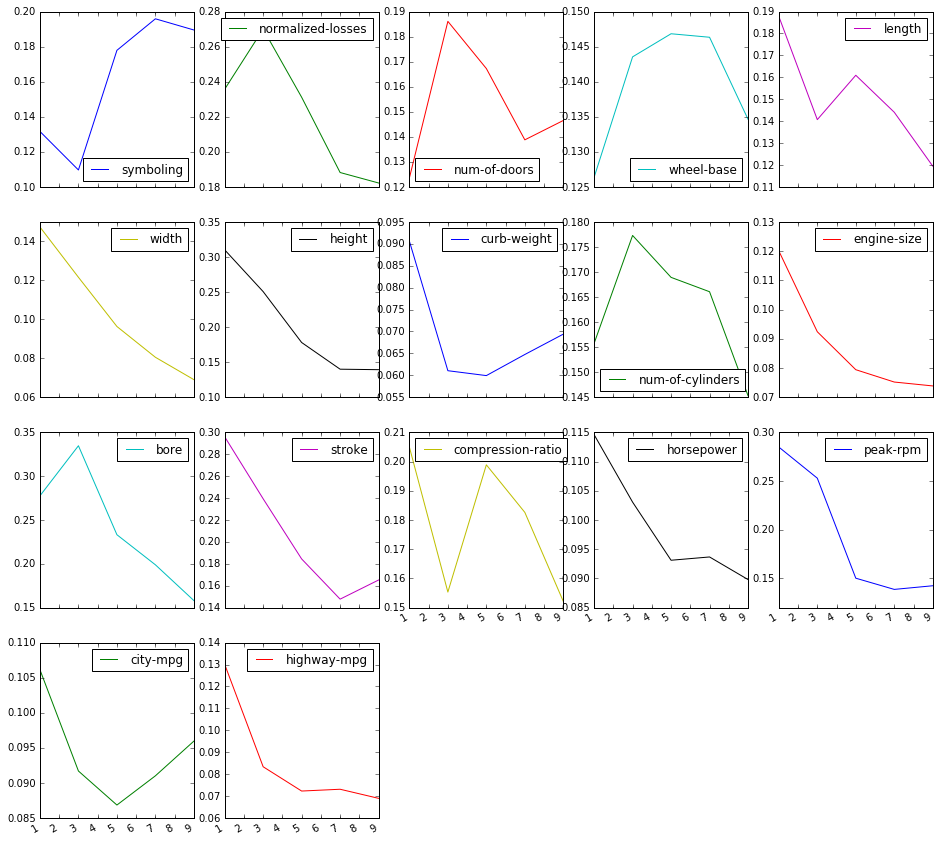

In [239]:
%matplotlib inline
import matplotlib.pyplot as plt
rmse_vals.plot(y = feature_cols, figsize = (16,16), subplots = True, layout = (4,5))
plt.show()

Now that we've explored the univariate case, we can take a look at a number of multivariate cases where we use from 2-5 features in order to determine how adding features affects the RMSE of our models.

In [244]:
default_k_results = rmse_vals.iloc[2]

default_k_results

symboling            0.177881
normalized-losses    0.231132
num-of-doors         0.167244
wheel-base           0.146833
length               0.160925
width                0.096312
height               0.178045
curb-weight          0.059935
num-of-cylinders     0.168930
engine-size          0.079419
bore                 0.233127
stroke               0.184405
compression-ratio    0.198860
horsepower           0.093101
peak-rpm             0.150183
city-mpg             0.086842
highway-mpg          0.072280
Name: 5, dtype: float64

In [245]:
default_k_results = default_k_results.sort_values(ascending = True)

curb-weight          0.059935
highway-mpg          0.072280
engine-size          0.079419
city-mpg             0.086842
horsepower           0.093101
width                0.096312
wheel-base           0.146833
peak-rpm             0.150183
length               0.160925
num-of-doors         0.167244
num-of-cylinders     0.168930
symboling            0.177881
height               0.178045
stroke               0.184405
compression-ratio    0.198860
normalized-losses    0.231132
bore                 0.233127
Name: 5, dtype: float64

### Multivariate Model

In [248]:
num_features = [2,3,4,5]
rmse_vals = {}
for num in num_features:
    rmse_vals[num] = (knn_train_test(default_k_results.index[0:num], target_cols, cars_scaled, 5))

for num_feats, rmse in rmse_vals.items():
    print('Number of features:', num_feats, 'RMSE:', rmse)

Number of features: 2 RMSE: 0.15799470455976328
Number of features: 3 RMSE: 0.12898098680048595
Number of features: 4 RMSE: 0.0822781283373737
Number of features: 5 RMSE: 0.10107620885302751


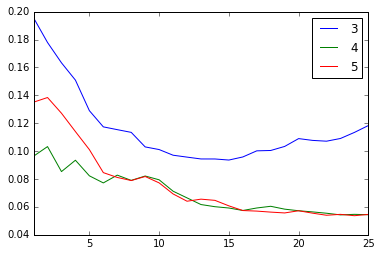

In [273]:
k_vals = [x for x in range(1,26)]
num_features = [3,4,5]
rmse_ = []

for num in num_features:
    rmse_vals = []
    for k in k_vals:
        rmse_vals.append(knn_train_test(default_k_results.index[0:num], target_cols, cars_scaled, k))
    rmse_.append(rmse_vals)
    

rmse_df = pd.DataFrame(rmse_, columns = k_vals, index = num_features)
for index, row in rmse_df.iterrows():
    row.plot(legend = True)



For the model employing only 3 features, the optimal k value appears to be around 15. On the other hand, the models that employ 4 and 5 features respectively both have their lowest visible points at a k value of 25, suggesting that we may need to test with higher values of k to see if we can find a minimum point in the rmse curve. 

# Conclusion

In this project we constructed a model to make predicitons on car sale price with high accuracy. We went through key machine learning procedures including data exploration, cleaning, dealing with missing values and feature selection along with a bit of hyperparameter tuning. In the end, we were able to crate a reliable model that predicts car sale price with good (+/-10%) confidence.